## **EXOPLANET DISCOVERY METHOD PREDICTION**

In [1]:
import numpy as np
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys
import logging
logging.getLogger('tensorflow').disabled = True

In [2]:
df = pd.read_csv("planets.csv")
df.head(5)

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
0,1,11 Com,b,Radial Velocity,1,326.03,0.32,-0.32,0.0,1.290,...,0.30,-0.30,0.0,0.0,19.00,2.00,-2.00,0.0,0.0,2014-05-14
1,2,11 UMi,b,Radial Velocity,1,516.22,3.25,-3.25,0.0,1.540,...,0.25,-0.25,0.0,0.0,24.08,1.84,-1.84,0.0,0.0,2014-05-14
2,3,14 And,b,Radial Velocity,1,185.84,0.23,-0.23,0.0,0.830,...,0.10,-0.20,0.0,0.0,11.00,1.00,-1.00,0.0,0.0,2014-05-14
3,4,14 Her,b,Radial Velocity,1,1773.40,2.50,-2.50,0.0,2.770,...,0.05,-0.05,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2014-05-14
4,5,16 Cyg B,b,Radial Velocity,1,798.50,1.00,-1.00,0.0,1.681,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2015-09-10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rowid            3372 non-null   int64  
 1   pl_hostname      3372 non-null   object 
 2   pl_letter        3372 non-null   object 
 3   pl_discmethod    3372 non-null   object 
 4   pl_pnum          3372 non-null   int64  
 5   pl_orbper        3305 non-null   float64
 6   pl_orbpererr1    3180 non-null   float64
 7   pl_orbpererr2    3180 non-null   float64
 8   pl_orbperlim     3304 non-null   float64
 9   pl_orbsmax       1897 non-null   float64
 10  pl_orbsmaxerr1   1020 non-null   float64
 11  pl_orbsmaxerr2   1019 non-null   float64
 12  pl_orbsmaxlim    1892 non-null   float64
 13  pl_orbeccen      974 non-null    float64
 14  pl_orbeccenerr1  701 non-null    float64
 15  pl_orbeccenerr2  701 non-null    float64
 16  pl_orbeccenlim   971 non-null    float64
 17  pl_orbincl    

In [4]:
df["pl_discmethod"].value_counts()

Transit                          2664
Radial Velocity                   591
Imaging                            42
Microlensing                       39
Transit Timing Variations          15
Eclipse Timing Variations           8
Orbital Brightness Modulation       6
Pulsar Timing                       5
Astrometry                          1
Pulsation Timing Variations         1
Name: pl_discmethod, dtype: int64

### Explanatory Data Analysis

In [5]:
df_combined = pd.DataFrame()
for method_type in df["pl_discmethod"].unique():
    df_temp = df[df["pl_discmethod"] == method_type]
    df_temp = pd.DataFrame(df_temp["pl_radj"].describe())
    df_temp.rename(columns={"pl_radj": method_type}, inplace = True)
    df_combined = pd.concat([df_combined, df_temp], axis=1)
print("Property type: pl_radj")
df_combined

Property type: pl_radj


,Radial Velocity,Imaging,Eclipse Timing Variations,Transit,Astrometry,Orbital Brightness Modulation,Transit Timing Variations,Microlensing,Pulsar Timing,Pulsation Timing Variations
count,10.000000,12.000000,0.0,2662.000000,0.0,3.000000,7.000000,0.0,0.0,0.0
mean,0.742900,1.877500,NaN,0.333808,NaN,0.501667,0.178857,NaN,NaN,NaN
std,0.428157,1.691033,NaN,0.360110,NaN,0.743352,0.055436,NaN,NaN,NaN
min,0.170000,0.920000,NaN,0.027000,NaN,0.068000,0.108000,NaN,NaN,NaN
25%,0.352500,1.162750,NaN,0.138000,NaN,0.072500,0.146000,NaN,NaN,NaN
50%,0.896500,1.210000,NaN,0.203000,NaN,0.077000,0.156000,NaN,NaN,NaN
75%,1.078500,1.630000,NaN,0.290750,NaN,0.718500,0.213500,NaN,NaN,NaN
max,1.320000,6.900000,NaN,2.090000,NaN,1.360000,0.269000,NaN,NaN,NaN


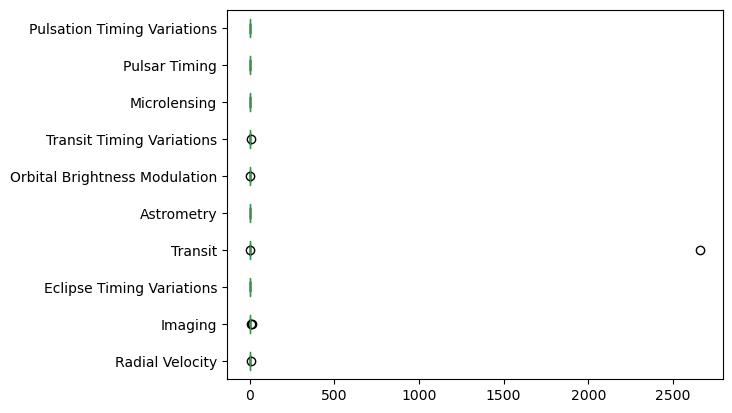

In [6]:
df_combined.boxplot(grid=False, vert=False, patch_artist=True)
plt.show()

In [7]:
df_combined = pd.DataFrame()
for method_type in df["pl_discmethod"].unique():
    df_temp = df[df["pl_discmethod"] == method_type]
    df_temp = pd.DataFrame(df_temp["st_dist"].describe())
    df_temp.rename(columns={"st_dist": method_type}, inplace = True)
    df_combined = pd.concat([df_combined, df_temp], axis=1)
print("Property type: st_dist")
df_combined

Property type: st_dist


,Radial Velocity,Imaging,Eclipse Timing Variations,Transit,Astrometry,Orbital Brightness Modulation,Transit Timing Variations,Microlensing,Pulsar Timing,Pulsation Timing Variations
count,556.000000,37.000000,2.0,1651.000000,1.00,2.0,4.00000,38.000000,4.0,1.0
mean,67.935234,70.138919,500.0,737.935778,20.77,1180.0,844.75000,4280.763158,750.0,1400.0
std,125.882850,52.292890,0.0,491.135848,NaN,0.0,910.32096,2250.044329,300.0,NaN
min,3.210000,7.690000,500.0,12.040000,20.77,1180.0,66.00000,600.000000,600.0,1400.0
25%,25.685000,25.000000,500.0,408.000000,20.77,1180.0,270.75000,2517.500000,600.0,1400.0
50%,44.050000,45.520000,500.0,687.000000,20.77,1180.0,597.00000,4100.000000,600.0,1400.0
75%,69.685000,125.000000,500.0,993.500000,20.77,1180.0,1171.00000,6075.000000,750.0,1400.0
max,2200.000000,165.000000,500.0,8500.000000,20.77,1180.0,2119.00000,8100.000000,1200.0,1400.0


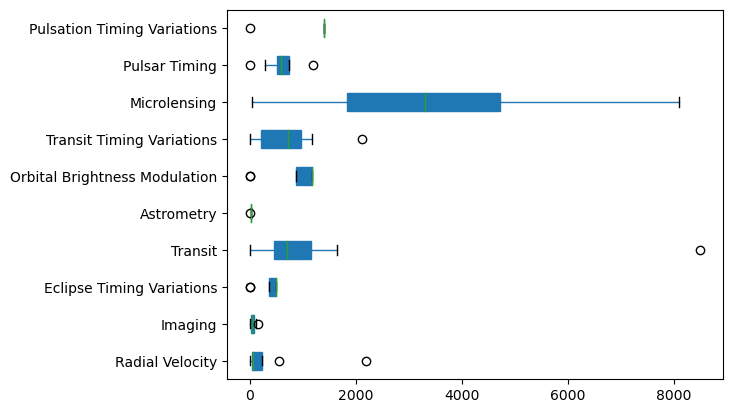

In [8]:
df_combined.boxplot(grid=False, vert=False, patch_artist=True)
plt.show()

In [9]:
df_combined = pd.DataFrame()
for method_type in df["pl_discmethod"].unique():
    df_temp = df[df["pl_discmethod"] == method_type]
    df_temp = pd.DataFrame(df_temp["pl_bmassj"].describe())
    df_temp.rename(columns={"pl_bmassj": method_type}, inplace = True)
    df_combined = pd.concat([df_combined, df_temp], axis=1)
print("Property type: pl_bmassj")
df_combined

Property type: pl_bmassj


,Radial Velocity,Imaging,Eclipse Timing Variations,Transit,Astrometry,Orbital Brightness Modulation,Transit Timing Variations,Microlensing,Pulsar Timing,Pulsation Timing Variations
count,589.000000,36.000000,8.000000,481.000000,1.0,3.000000,11.000000,39.000000,5.000000,1.0
mean,2.918713,12.650252,4.820000,1.542267,28.5,0.671167,1.376545,2.004917,0.745172,3.2
std,4.018516,6.142603,2.321348,3.214659,NaN,1.159464,2.630188,3.209824,1.108369,NaN
min,0.004280,2.000000,1.900000,0.000200,28.5,0.001400,0.011000,0.007300,0.000060,3.2
25%,0.450000,7.875000,2.660000,0.070000,28.5,0.001750,0.064500,0.080230,0.012270,3.2
50%,1.500000,11.934500,5.125000,0.617000,28.5,0.002100,0.183000,0.510000,0.013530,3.2
75%,3.480000,16.000000,6.557500,1.400000,28.5,1.006050,0.501500,2.665000,1.200000,3.2
max,27.000000,24.500000,7.700000,28.000000,28.5,2.010000,7.300000,12.569000,2.500000,3.2


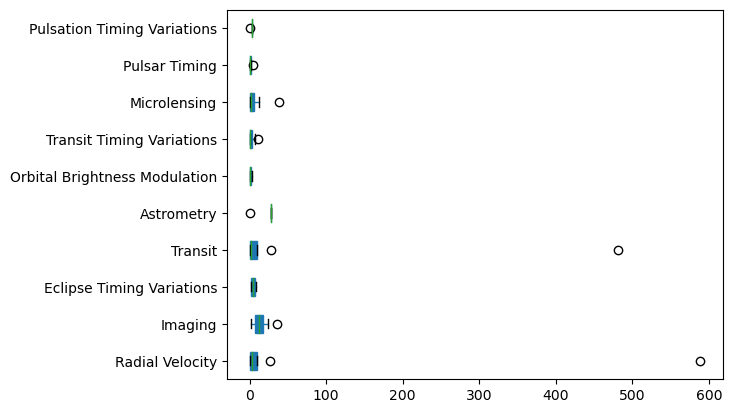

In [10]:
df_combined.boxplot(grid=False, vert=False, patch_artist=True)
plt.show()

### Machine Learning Algorithm

In [11]:
df = df[["pl_discmethod", "pl_radj", "st_dist", "pl_bmassj"]].fillna(sys.maxsize)
#df.dropna(how="any", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_discmethod  3372 non-null   object 
 1   pl_radj        3372 non-null   float64
 2   st_dist        3372 non-null   float64
 3   pl_bmassj      3372 non-null   float64
dtypes: float64(3), object(1)
memory usage: 105.5+ KB


In [12]:
proprties = ["pl_radj", "st_dist", "pl_bmassj"]
methods = df["pl_discmethod"].unique()

In [13]:
CATEGORICAL_COLUMNS = ["pl_discmethod"]

In [14]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

In [15]:
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary_mapping = {value: index for index, value in enumerate(df[feature_name].unique())}
    df[feature_name] = df[feature_name].apply(lambda x: vocabulary_mapping.get(x, -1))  # -1 for unknown values

In [16]:
X = df.drop(columns=["pl_discmethod"], inplace = False)
y = df[["pl_discmethod"]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [19]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
#print(my_feature_columns)

In [20]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=len(df["pl_discmethod"].unique()))

In [21]:
classifier.train(
    input_fn=lambda: input_fn(X_train, y_train, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously

In [22]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(X_test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.779



In [26]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features =["pl_radj", "st_dist","pl_bmassj"]
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  if valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        methods[class_id], 100 * probability))

Please type numeric values as prompted.


pl_radj:  8
st_dist:  1000
pl_bmassj:  43


Prediction is "Transit" (12.1%)
